In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib2

In [37]:
URLS = ["http://www.hsa-haiku.org/hendersonawards/henderson.htm",
        "http://www.hsa-haiku.org/bradyawards/brady.htm"]

In [6]:
soup = BeautifulSoup(page, 'html.parser')

In [38]:
CSS_PATH = "table > tr > td > blockquote > p"

In [39]:
haikus = []
for URL in URLS:
    page = urllib2.urlopen(URL).read()
    soup = BeautifulSoup(page, 'html.parser')
    haikus.extend(soup.select(CSS_PATH))

In [40]:
len(haikus)

446

In [44]:
for i in xrange(10):
    print i, haikus[280+i].text

0  night crossing 
          Tijuana border guard
           in sunglasses
1 small town
          the same dream
          as last night 
2 half-empty cup
          I decide I’ve had enough
          of you 
3 middle age
          in the mirror
          the turn toward it
4 wedding day
          the time he takes
          to knot the tie
5 stick figures
          including one
          i recognize
6 boy girl party
          the slow speed
          of the blender

7 life and death decisions
          the need to feel
          the satin lining
8 perfect storm the perfume not hers

9 phantom pain—
          the shape of her
          in a stranger



In [53]:
URL = "http://www.hsa-haiku.org/museumhaikuliteratureawards/museumhaikuliterature-award.htm"
CSS_PATH = "p.haiku"
page = urllib2.urlopen(URL).read()
soup = BeautifulSoup(page, 'html.parser')
temp = soup.select(CSS_PATH)

In [57]:
len(temp)
haikus.extend(temp)

In [173]:
count = 0
for k in haikus + j_haikus + c_haikus:
    for c in k.text:
        if c.isalpha():
            count += 1
print count

109329


In [97]:
URL = "http://www.hsa-haiku.org/virgilioawards/virgilio.htm"
CSS_PATH = "div"
page = urllib2.urlopen(URL).read()
soup = BeautifulSoup(page, 'html.parser')
temp = soup.select(CSS_PATH)

In [107]:
temp[2].select("p")

[<p><i>Alex Degus, 18, Grade 12<br>
                       School of the Arts<br>
 </br></br></i><i>Rochester, New York</i> </p>, <p>grandma's wake<br>
                       my little cousin<br>
                       shakes her etch-a-sketch<br>
 </br></br></br></p>, <p><i>Guilia Perucchio, 14, Grade 9<br>
                       School of the Arts<br>
                       Rochester, New York</br></br></i><i><br>
 </br></i> </p>, <p>memories<br>
                       caught in my brush<br>
                       long strands</br></br></p>, <p><i>Allen Bartter, Age 15, Grade 10<br>
                       School of the Arts<br>
                       Rochester, New York</br></br></i>
 </p>, <p>pre-school<br>
                       a triangle block<br>
                       stuck in a square hole</br></br></p>, <p><i>Kate Bosek-Sills, Age 15,Grade 10<br>
                       School of the Arts<br>
 </br></br></i><i>Rochester, New York</i> </p>, <p>harvest moon<br>
                 

In [189]:
data = []
for k in haikus + j_haikus + c_haikus:
    k = k.text.lower().strip()
    if k is None:
        continue
    l = "\t".join(l.strip() for l in k.splitlines() if l is not None)
    data.append(l)
print len(data)
data = pd.DataFrame(data, columns=["text"])

2524


In [118]:
data.to_json("haikus.json")

In [119]:
data = pd.read_json("haikus.json")

In [201]:
data.text.apply(lambda x: len(x)).mean()
with open("haiku.txt", "wb+") as fp:
    for k in data.values:
        print >> fp, k[0].encode('ascii', 'ignore')

In [204]:
%matplotlib inline

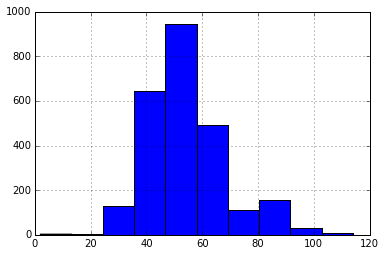

In [205]:
data.text.apply(lambda x: len(x)).hist()

In [135]:
# Source http://sacred-texts.com/shi/jh/index.htm
URLS = ["http://sacred-texts.com/shi/jh/jh0%s.htm" % k for k in xrange(2,8)]
URLS

['http://sacred-texts.com/shi/jh/jh02.htm',
 'http://sacred-texts.com/shi/jh/jh03.htm',
 'http://sacred-texts.com/shi/jh/jh04.htm',
 'http://sacred-texts.com/shi/jh/jh05.htm',
 'http://sacred-texts.com/shi/jh/jh06.htm',
 'http://sacred-texts.com/shi/jh/jh07.htm']

In [133]:
CSS_PATH = "table > tr:nth-of-type(1) > td:nth-of-type(1) > p"
j_haikus = []
for URL in URLS:
    page = urllib2.urlopen(URL).read()
    soup = BeautifulSoup(page, 'html.parser')
    j_haikus.extend(soup.select(CSS_PATH))
    print len(j_haikus)

36
76
116
156
196
220


In [131]:
CSS_PATH = "table > tr:nth-of-type(1) > td:nth-of-type(1) > p"
j_haikus = []
page = urllib2.urlopen(URL).read()
soup = BeautifulSoup(page, 'html.parser')
j_haikus.extend(soup.select(CSS_PATH))
print len(j_haikus)

24


In [132]:
j_haikus

[<p>CONSIDERATE   DOGS ...<br>     STEPPING OFF<br>     INTO THE SNOW<br>   AS I WALK THE PATH<br> <br> </br></br></br></br></br></p>,
 <p>BUT WHEN I   HALTED<br>     ON THE WINDY STREET<br>     AT TWILIGHT...<br>   SNOW STRUCK AGAINST ME<br> <br> </br></br></br></br></br></p>,
 <p>CALL HIM BACK!   AH NO,<br>     HE'S BLOWN FROM SIGHT<br>     ALREADY...<br>   FISH-PEDDLER IN THE SNOW<br> <br> </br></br></br></br></br></p>,
 <p>CROSSING IT ALONE<br>     IN COLD MOONLIGHT...<br>     THE BRITTLE BRIDGE<br>   ECHOES MY FOOTSTEPS<br> <br> </br></br></br></br></br></p>,
 <p>SUCH A LITTLE   CHILD<br>     TO SEND TO BE<br>     A PRIESTLING<br>   ICY POVERTY<br> <br> </br></br></br></br></br></p>,
 <p>WINDY WINTER   RAIN...<br>     MY SILLY BIG<br>     UMBRELLA<br>   TRIES WALKING BACKWARD<br> <br> </br></br></br></br></br></p>,
 <p>BUDDHA ON THE   HILL...<br>     FROM YOUR HOLY<br>     NOSE INDEED<br>   HANGS AN ICICLE<br> <br> </br></br></br></br></br></p>,
 <p>THIS SNOWY   MORNING<br>     TH

In [156]:
# Contest Archive
# http://www.thehaikufoundation.org/contest-archive-details/?IDsponsor=8
BASE_URL = "http://www.thehaikufoundation.org/contest-archive-details/?IDsponsor=8"
URL_SELECTOR = "main.content li a"
page = urllib2.urlopen(BASE_URL).read()
soup = BeautifulSoup(page, 'html.parser')
URLS = [k.attrs['href'] for k in soup.select(URL_SELECTOR)]

In [157]:
URLS

[u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=325',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=314',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=279',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=252',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=222',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=94',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=93',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=92',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=91',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=90',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=89',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=88',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=87',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=86',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=85',
 u'ht

In [162]:
CSS_PATH = "table pre"
c_haikus = []
for URL in URLS:
    page = urllib2.urlopen(URL).read()
    soup = BeautifulSoup(page, 'html.parser')
    c_haikus.extend(soup.select(CSS_PATH))
    print len(c_haikus)

11
22
33
44
55
66
77
88
99
110
122
133
144
155
166
177
188
199


In [166]:
BASE_URL = "http://www.thehaikufoundation.org/contest-archive/"
URL_SELECTOR = "div.entry-content li a"
page = urllib2.urlopen(BASE_URL).read()
soup = BeautifulSoup(page, 'html.parser')
URLS = []
BASE_URLS = [k.attrs['href'] for k in soup.select(URL_SELECTOR)]
print len(BASE_URLS)
URL_SELECTOR = "main.content li a"
for u in BASE_URLS:
    page = urllib2.urlopen(u).read()
    soup = BeautifulSoup(page, 'html.parser')
    URLS.extend([k.attrs['href'] for k in soup.select(URL_SELECTOR)])
    print len(URLS)

18
1
19
20
45
61
126
127
134
143
149
161
174
175
175
175
176
187
190


In [169]:
URLS[:10]

[u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=322',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=325',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=314',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=279',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=252',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=222',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=94',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=93',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=92',
 u'http://www.thehaikufoundation.org/collection-haiku/?IDcat=91']

In [171]:
CSS_PATH = "table pre"
c_haikus = []
for URL in URLS:
    page = urllib2.urlopen(URL).read()
    soup = BeautifulSoup(page, 'html.parser')
    c_haikus.extend(soup.select(CSS_PATH))
    print len(c_haikus), "->", 

14 -> 25 -> 36 -> 47 -> 58 -> 69 -> 80 -> 91 -> 102 -> 113 -> 124 -> 136 -> 147 -> 158 -> 169 -> 180 -> 191 -> 202 -> 213 -> 222 -> 228 -> 234 -> 239 -> 244 -> 259 -> 270 -> 284 -> 297 -> 308 -> 322 -> 332 -> 340 -> 353 -> 367 -> 377 -> 387 -> 400 -> 410 -> 423 -> 435 -> 446 -> 458 -> 479 -> 491 -> 511 -> 520 -> 520 -> 530 -> 537 -> 547 -> 555 -> 564 -> 571 -> 578 -> 588 -> 598 -> 607 -> 613 -> 632 -> 639 -> 647 -> 650 -> 657 -> 663 -> 668 -> 675 -> 681 -> 688 -> 695 -> 702 -> 709 -> 718 -> 724 -> 729 -> 739 -> 748 -> 755 -> 762 -> 769 -> 777 -> 784 -> 791 -> 798 -> 801 -> 804 -> 813 -> 819 -> 824 -> 832 -> 838 -> 848 -> 854 -> 859 -> 864 -> 869 -> 878 -> 886 -> 891 -> 896 -> 903 -> 909 -> 916 -> 924 -> 931 -> 939 -> 946 -> 953 -> 960 -> 967 -> 970 -> 981 -> 989 -> 998 -> 1004 -> 1017 -> 1027 -> 1035 -> 1038 -> 1048 -> 1061 -> 1064 -> 1075 -> 1087 -> 1088 -> 1090 -> 1093 -> 1103 -> 1114 -> 1124 -> 1135 -> 1145 -> 1155 -> 1165 -> 1173 -> 1176 -> 1193 -> 1207 -> 1222 -> 1237 -> 1252 -> 1

In [172]:
c_haikus[:10]

[<pre style="font-family: Arial, Helvetica, sans-serif; ">Driftwood beach wondering if it's too late to put down roots</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">Caressed by sea air
 oranges swell with the sight
 of Gogoshima</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">menage a trois
 on a citrus tree
 summer dreams</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">orange blossoms --
 on the piano lid
 a sky full of stars</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">cycle-weary
 a yen
 for the ferryman</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">spring pedaling
 on the marine road
 through the islands</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">the wake
 of an upstream eel
 in dawn's light</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">marina --
 I cast anchor
 near the moon</pre>,
 <pre style="font-family: Arial, Helvetica, sans-serif; ">Matsuyama b

In [182]:
c_haikus[10].text.strip().lower().splitlines()

[u'driftwood:', u'the way an old dog', u'settles his chin on your knee']

### TODO
* Collect more data from: http://www.dijitari.com/xvii/categories/all_vdesc_1.html

In [210]:
BASE_URL = "http://www.dijitari.com/xvii/categories/all_vdesc_1.html"
page = urllib2.urlopen(BASE_URL).read()
soup = BeautifulSoup(page, 'html.parser')

In [220]:
URL_SELECTOR = "table > tr > td > font p a"
BASE_URLS = [k.attrs['href'] for k in soup.select(URL_SELECTOR)]
print len(BASE_URLS)
print BASE_URLS
BASE_URLS = [u'all_vdesc_1.html', u'all_vdesc_2.html', u'all_vdesc_3.html', u'all_vdesc_4.html',
             u'all_vdesc_5.html', u'all_vdesc_6.html', u'all_vdesc_7.html', u'all_vdesc_8.html',
             u'all_vdesc_9.html', u'all_vdesc_10.html', u'all_vdesc_11.html', u'all_vdesc_12.html',
             u'all_vdesc_13.html', u'all_vdesc_14.html', u'all_vdesc_15.html', u'all_vdesc_16.html',
             u'all_vdesc_17.html', u'all_vdesc_18.html', u'all_vdesc_19.html', u'all_vdesc_20.html',
             u'all_vdesc_21.html', u'all_vdesc_22.html', u'all_vdesc_23.html', u'all_vdesc_24.html',
             u'all_vdesc_25.html', u'all_vdesc_26.html', u'all_vdesc_27.html', u'all_vdesc_28.html',
             u'all_vdesc_29.html', u'all_vdesc_30.html', u'all_vdesc_31.html', u'all_vdesc_32.html',
             u'all_vdesc_33.html', u'all_vdesc_34.html']
BASE_URL = "http://www.dijitari.com/xvii/categories/"
BASE_URLS = [BASE_URL + k for k in BASE_URLS]
print BASE_URLS

71
[u'/xvii/cgi-bin/xvii_auth.pl?id=25', u'/xvii/cgi-bin/xvii_vote.pl?id=68', u'/xvii/cgi-bin/xvii_auth.pl?id=1', u'/xvii/cgi-bin/xvii_vote.pl?id=213', u'/xvii/cgi-bin/xvii_auth.pl?id=17', u'/xvii/cgi-bin/xvii_vote.pl?id=113', u'/xvii/cgi-bin/xvii_auth.pl?id=1', u'/xvii/cgi-bin/xvii_vote.pl?id=64', u'/xvii/cgi-bin/xvii_vote.pl?id=78', u'/xvii/cgi-bin/xvii_auth.pl?id=34', u'/xvii/cgi-bin/xvii_vote.pl?id=190', u'/xvii/cgi-bin/xvii_auth.pl?id=43', u'/xvii/cgi-bin/xvii_vote.pl?id=259', u'/xvii/cgi-bin/xvii_auth.pl?id=17', u'/xvii/cgi-bin/xvii_vote.pl?id=114', u'/xvii/cgi-bin/xvii_auth.pl?id=32', u'/xvii/cgi-bin/xvii_vote.pl?id=154', u'/xvii/cgi-bin/xvii_auth.pl?id=26', u'/xvii/cgi-bin/xvii_vote.pl?id=138', u'/xvii/cgi-bin/xvii_auth.pl?id=1', u'/xvii/cgi-bin/xvii_vote.pl?id=165', u'/xvii/cgi-bin/xvii_vote.pl?id=66', u'/xvii/cgi-bin/xvii_auth.pl?id=1', u'/xvii/cgi-bin/xvii_vote.pl?id=97', u'/xvii/cgi-bin/xvii_auth.pl?id=43', u'/xvii/cgi-bin/xvii_vote.pl?id=255', u'/xvii/cgi-bin/xvii_vote.pl?

In [239]:
CSS_PATH = "p table > tr > td > font > font"
URLS = BASE_URLS
x_haikus = []
for URL in URLS:
    page = urllib2.urlopen(URL).read()
    soup = BeautifulSoup(page, 'html.parser')
    x_haikus.extend(soup.select(CSS_PATH))
    print len(x_haikus), "->", 

18 -> 36 -> 54 -> 72 -> 90 -> 108 -> 126 -> 144 -> 162 -> 180 -> 198 -> 216 -> 234 -> 252 -> 270 -> 288 -> 306 -> 324 -> 342 -> 360 -> 378 -> 396 -> 414 -> 432 -> 450 -> 468 -> 486 -> 504 -> 522 -> 540 -> 558 -> 576 -> 594 -> 598 ->


In [228]:
CSS_PATH = "p table > tr > td > font > font"
x_haikus = soup.select(CSS_PATH)

In [236]:
x_haikus[0].text.split("--")[0].replace(u'\xa0', ' ').splitlines()

[u'An old pond!', u'A frog jumps in-', u'The sound of water. ']

In [241]:
"""
data = []
for k in haikus + j_haikus + c_haikus:
    k = k.text.lower().strip()
    if k is None:
        continue
    l = "\t".join(l.strip() for l in k.splitlines() if l is not None)
    data.append(l)
print len(data)
data = pd.DataFrame(data, columns=["text"])
"""

data_x = []
for k in x_haikus:
    k = k.text.split("--")[0].replace(u'\xa0', ' ').lower().strip()
    if k is None:
        continue
    l = "\t".join(l.strip() for l in k.splitlines() if l is not None)
    data_x.append(l)
print len(data_x)
data_x = pd.DataFrame(data_x, columns=["text"])
data_x.head()

598


,text
0,an old pond!\ta frog jumps in-\tthe sound of w...
1,a beautiful weed\tsprouting in the summer sun....
2,great japan!\twhere a bird sings\tthe lotus sutra
3,"it's 4:10 am\ti can't think straight, and much..."
4,bust out pda...\twhat do i see on the screen?\...


In [243]:
print "data_x", data_x.text.apply(lambda x: len(x)).sum()
print "data", data.text.apply(lambda x: len(x)).sum()

data_x 38939
data 136300


In [249]:
data_all = data.append(data_x)
print data_all.shape, data.shape, data_x.shape

(3122, 1) (2524, 1) (598, 1)


In [250]:
data_all.head()

,text
0,county fair\tsecond place ribbon\tin an empty ...
1,junk car\tthe hum of bees\tbeneath the hood
2,the christmas\tafter we told them\tartificial ...
3,a bit of rust\ton the chevy's fender\tharvest ...
4,a lightning strike gives up a flower


In [251]:
with open("haiku_all.txt", "wb+") as fp:
    for k in data_all.values:
        print >> fp, k[0].encode('ascii', 'ignore')

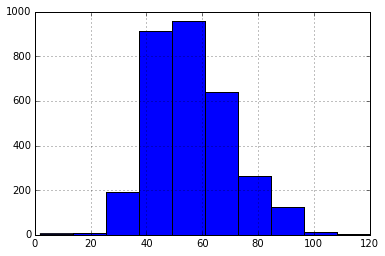

In [252]:
data_all.text.apply(lambda x: len(x)).hist()

In [260]:
data_all.text[data_all.text.apply(lambda x: len(x)) > 100].values[8].replace(u'\xa0', ' ')

u'death-song:     three loveliest things:     moonlight ... cherry-   bloom ... now i go   seeking silent snow'